In [1]:
import os
import numpy as np
import pandas as pd
import PairSC
import Utils
import scanpy as sc
import DE

In [2]:
# Loading reference dataset and reference annotation
refDataset = pd.read_csv("./Data/References/10X/10X_data.csv", sep=",", decimal = ",", index_col = 0)
refDataset = refDataset.astype('float')
refAnnot = pd.read_csv("./Data/References/10X/10X_annot.csv",sep=",", index_col = 0)

In [13]:
# A reference expression data exmaple
refDataset.head()

,GTGCTAGAAGCAAA-1,CGTACCACGTCGTA-1,AACACTCTTTCGGA-1,CGATCAGATTGGTG-1,TACTACTGTCGATG-1,GATCTTACCCGCTT-1,TACTTGACGGAGCA-1,GGGTAACTCTCTCG-1,TGAATAACTTCGCC-1,AAGTCCGACTTGCC-1,...,CCAACCTGAAAAGC-1,GCACCTTGTCCAGA-1,CACTAACTAAGAAC-1,ATGCAGACTCAGTG-1,CCGGAGACCGTTAG-1,TTATGGCTGTATCG-1,CGGGACTGTGGTGT-1,TCATTCGACGTGTA-1,CTTGAGGATGTGAC-1,TCATGTACGGTACT-1
MIR1302-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM138A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OR4F5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RP11-34P13.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# An annotation data exmaple
refAnnot.head()

,cellType
GTGCTAGAAGCAAA-1,B_cells
CGTACCACGTCGTA-1,B_cells
AACACTCTTTCGGA-1,B_cells
CGATCAGATTGGTG-1,B_cells
TACTACTGTCGATG-1,B_cells


In [3]:
# Loading single cell data
# The link is the location of the 10X data or the count matrix.
# In case the file is a count matrix, please indicate "expression" in file name"
scData = Utils.readSCData("./Data/",250)

In [15]:
# Single cell data example
scData.obs.head()

,n_counts,n_genes,cellType,percent_mito
cy80-CD45-pos-PD1-pos-H10-S190-comb,76241232.0,2625,B_cells,0.0
cy79-p1-CD45-pos-PD1-neg-AS-C1-R2-F09-S549-comb,76759864.0,2325,B_cells,0.0
cy72-CD45-pos-E02-S914-comb,83393320.0,4130,B_cells,0.0
cy60_1_cd_45_pos_HC_pos_HLDAR_pos_B12_S984_comb,67387312.0,2228,B_cells,0.0
Cy72_CD45_F04_S736_comb,56852424.0,2057,B_cells,0.0


In [16]:
# Single cell data example
scData.var.head()

,n_cells
RPS11,273
ELMO2,53
PNMA1,36
TMEM216,28
TRAF3IP2-AS1,228


In [4]:
# Creating PairSC object
obj = PairSC.createObject(refDataset=refDataset,refAnnot=refAnnot,refName="SampleRef")

In [5]:
# Adding te single cell data to the PairSC object
# Warning: Once the program runs, it save the DE genes according to refName and scName,
# in case these names are used again, it uses the same DE genes. So if the user changes 
# the reference or the single cell data, it is highly reccomended to change the names as well.
obj.addScData(scData,scName="SampleSC")

In [6]:
# Obtainig cell types
obj.getCellTypes()

100%|█████████████████████████████████████████████████████████████████████████████| 100.0/100 [00:00<00:00, 106.55it/s]


In [7]:
# Generationg driver genes.
obj.getDriverGenes()

C:\Users\murat_gga8ya6\Desktop\Thesis\PairSC\Utils.py:149: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  cand_lvl = pd.concat([cand_lvl, type1_drivers],axis =1).replace(float("NaN"),0)


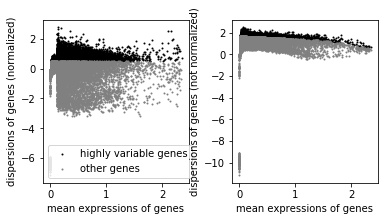

... storing 'cellType' as categorical


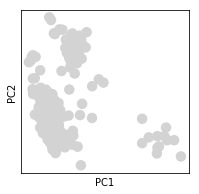

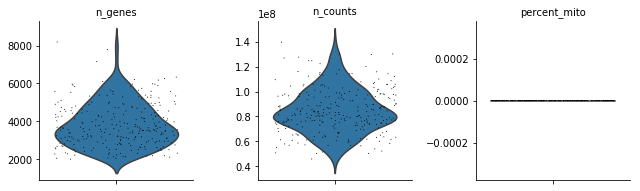

Memory usage: current 0.47 GB, difference +0.47 GB
Memory usage: current 0.47 GB, difference +0.00 GB


... storing 'cellType' as categorical


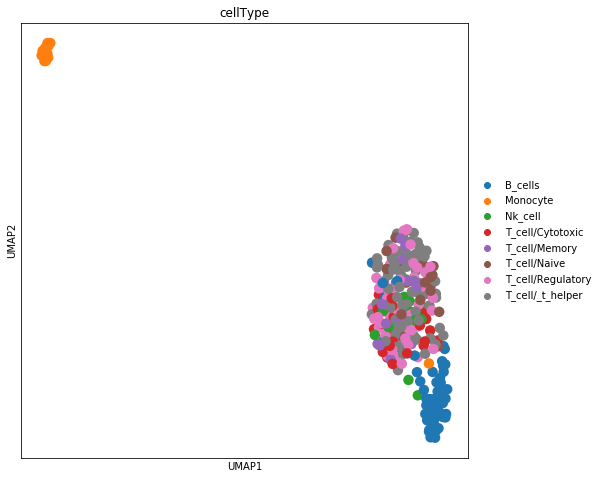

In [8]:
# Obtaining UMAP
# Warning: This function is still experimental. Alternatively, UMAP can be generated from the obj.scData by the user.
obj.getUMAP(False)

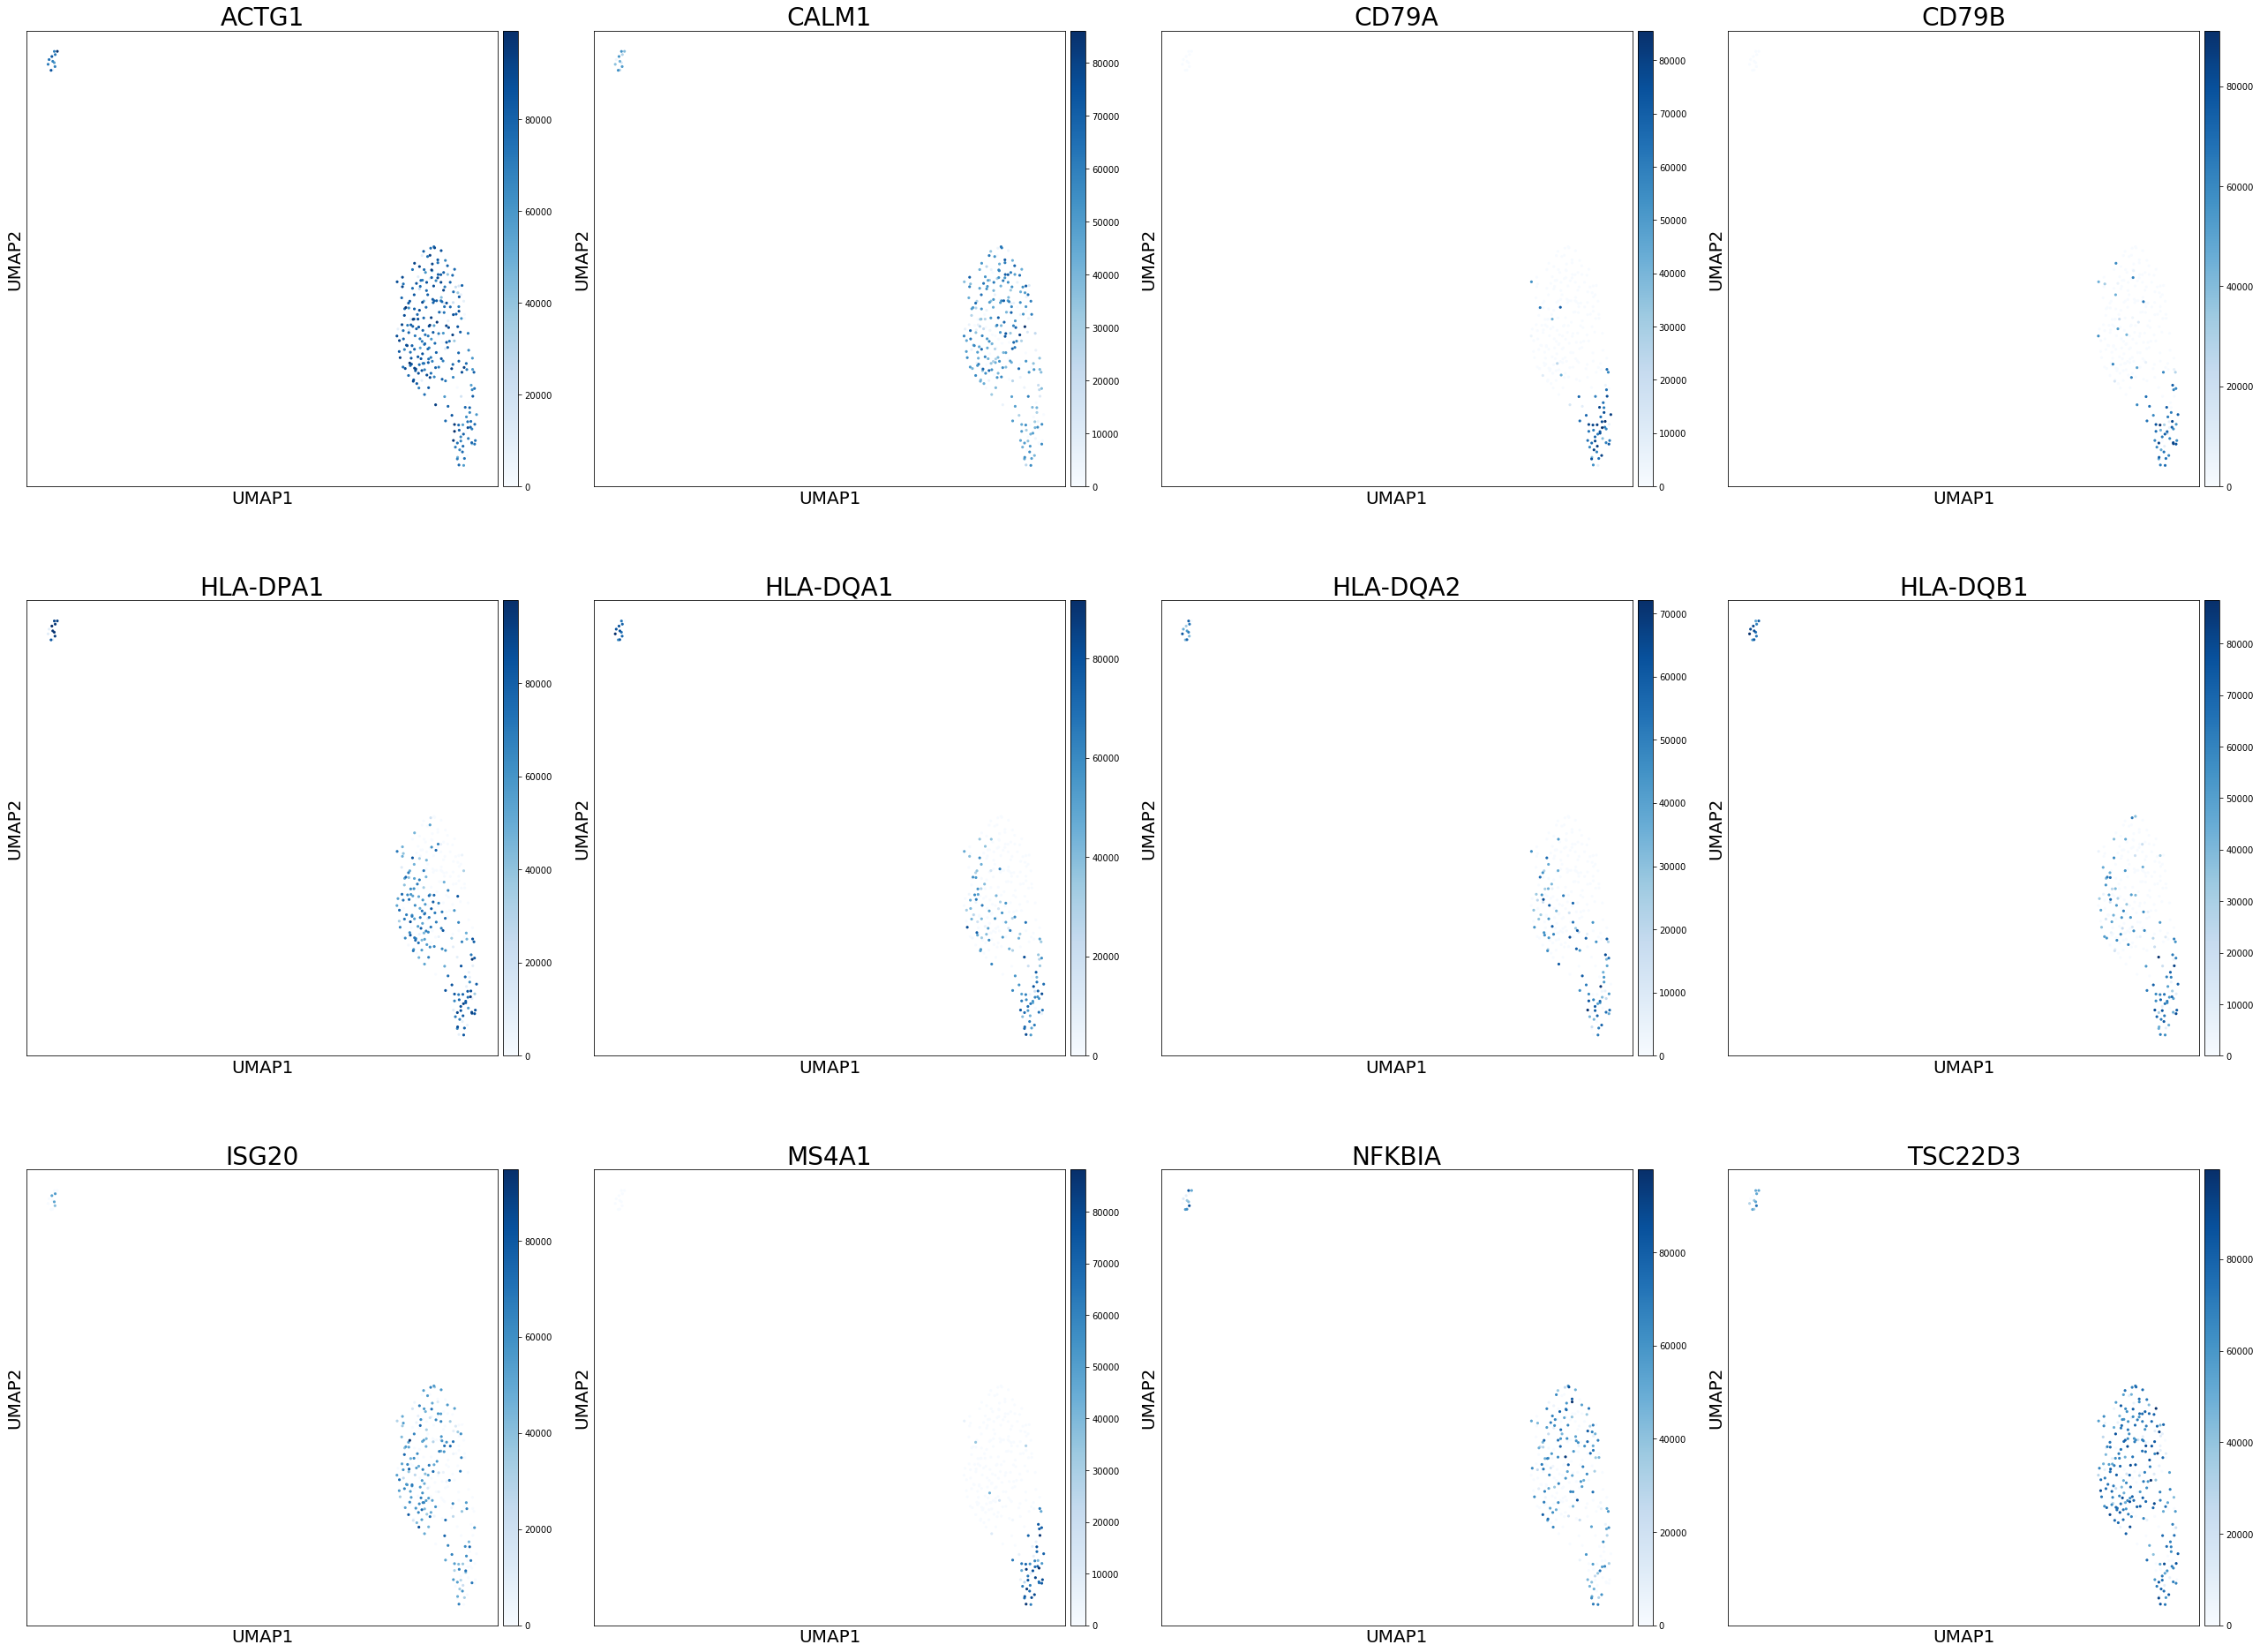

In [9]:
# Obtaining gene expression dispersion.
# The user can ethier enter a cell type, to visualize driver genes, or his/her gene of interest.
obj.getDriverDispersion(cellType="B_cells",geneList= None)

In [10]:
# Driver genes generated by the algorithm.
obj.driverGenes

{'B_cells': array(['ACTG1', 'CALM1', 'CD79A', 'CD79B', 'HLA-DPA1', 'HLA-DQA1',
        'HLA-DQA2', 'HLA-DQB1', 'ISG20', 'MS4A1', 'NFKBIA', 'TSC22D3'],
       dtype=object),
 'Monocyte': array(['AIF1', 'ARHGDIB', 'BTF3', 'BTG1', 'CORO1A', 'CST3', 'DDX5',
        'EEF1B2', 'GLTSCR2', 'GPX1', 'GSTP1', 'HLA-E', 'HNRNPA1', 'KLF6',
        'LAMTOR4', 'LGALS1', 'LST1', 'LYZ', 'MYL12A', 'NPM1', 'PABPC1',
        'PSAP', 'PTPRCAP', 'RPL22', 'RPL5', 'S100A8', 'S100A9', 'TMEM66',
        'TSPO', 'TYMP'], dtype=object),
 'Nk_cell': array(['APRT', 'CCL5', 'CLIC1', 'CLIC3', 'CST7', 'CTSW', 'FGFBP2', 'GNLY',
        'GZMA', 'GZMB', 'HOPX', 'KLRB1', 'NKG7', 'PLAC8', 'PRF1'],
       dtype=object),
 'T_cell/Cytotoxic': array(['CD8B', 'COX6B1', 'CUTA', 'FOS', 'HSP90AA1', 'LSP1', 'SOD1'],
       dtype=object),
 'T_cell/Memory': array(['C19ORF43', 'CD99', 'EVL', 'LY6E', 'S100A11', 'SRSF5', 'VAMP8'],
       dtype=object),
 'T_cell/Naive': array(['ATP5O', 'CHCHD2', 'CIRBP', 'CYBA', 'GIMAP1', 'HMGN1', 'LAT',
